In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
os.getcwd()

'/kaggle/working'

### Prepare data

In [3]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
train_df.info()

Training data shape: (42000, 785)
Test data shape: (28000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
y = train_df['label']
X = train_df.drop(columns=['label'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Prepare data

In [8]:
# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# Reshape data
X_train_reshaped = X_train.values.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.values.reshape(-1, 28, 28, 1)

In [10]:
X_train_reshaped[100].shape

(28, 28, 1)

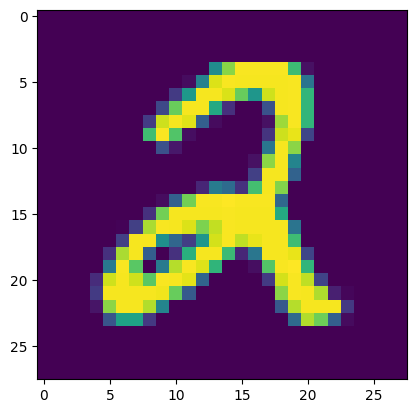

In [11]:
# Display a digit
eg = plt.imshow(X_train_reshaped[100])

### (softmax) Logistic regression model

In [12]:
# Train a logisitic regression model (no need for OHE because done automatically by LogisticRegression)
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
# Make predictions
y_pred_logit = logit.predict(X_test)

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logit)
print(f"Training Accuracy: {accuracy:.4f}")

Training Accuracy: 0.9189


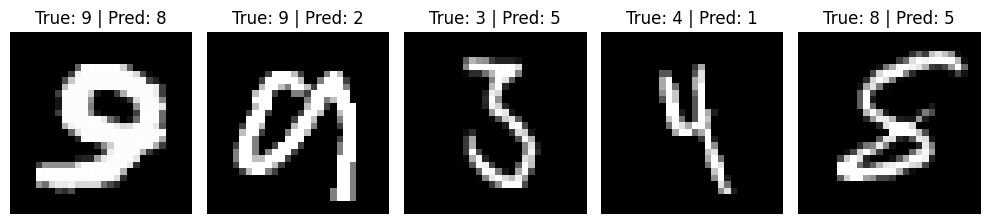

In [21]:
# Get and show some errors
errors = (y_pred_logit != y_test)
error_indices = np.where(errors)[0][:5]

fig, ax = plt.subplots(1, 5, figsize=(10, 5))

for i, index in enumerate(error_indices):
    ax[i].imshow(X_test.iloc[index].values.reshape(28, 28), cmap='gray')    
    ax[i].set_title(f'True: {y_test.iloc[index]} | Pred: {y_pred_logit[index]}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

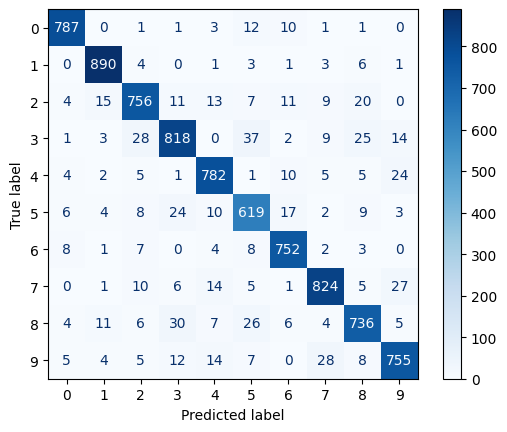

In [23]:
cm = confusion_matrix(y_test, y_pred_logit)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique().sort())
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Random forest

In [25]:
# Initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
# Train the RF model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Make predictions
y_pred_rf = rf.predict(X_test)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Training Accuracy: {accuracy:.4f}")

Training Accuracy: 0.9630


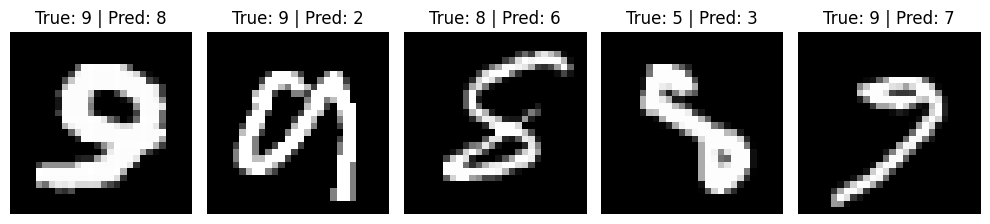

In [29]:
# Get and show some errors
errors = (y_pred_rf != y_test)
error_indices = np.where(errors)[0][:5]

fig, ax = plt.subplots(1, 5, figsize=(10, 5))

for i, index in enumerate(error_indices):
    ax[i].imshow(X_test.iloc[index].values.reshape(28, 28), cmap='gray')    
    ax[i].set_title(f'True: {y_test.iloc[index]} | Pred: {y_pred_rf[index]}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

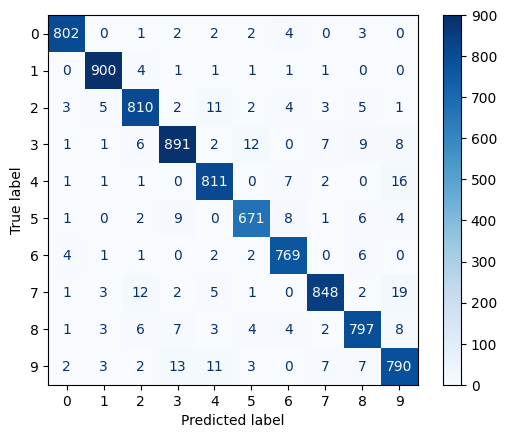

In [30]:
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique().sort())
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Gradient boosting

In [33]:
# Initialize xgboost model
xgboost = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')

In [35]:
# Train the model
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
# Make preds
y_pred_xg = xgboost.predict(X_test)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xg)
print(f"Training Accuracy: {accuracy:.4f}")

Training Accuracy: 0.9739


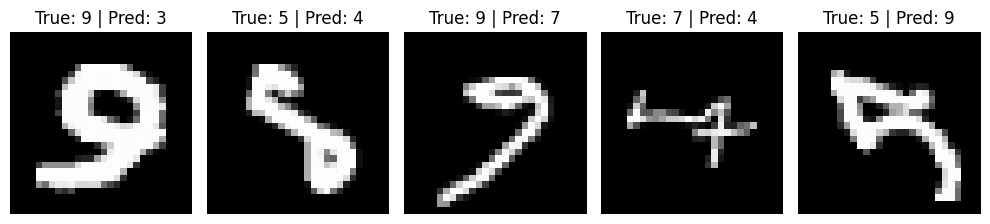

In [38]:
# Get and show some errors
errors = (y_pred_xg != y_test)
error_indices = np.where(errors)[0][:5]

fig, ax = plt.subplots(1, 5, figsize=(10, 5))

for i, index in enumerate(error_indices):
    ax[i].imshow(X_test.iloc[index].values.reshape(28, 28), cmap='gray')    
    ax[i].set_title(f'True: {y_test.iloc[index]} | Pred: {y_pred_xg[index]}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

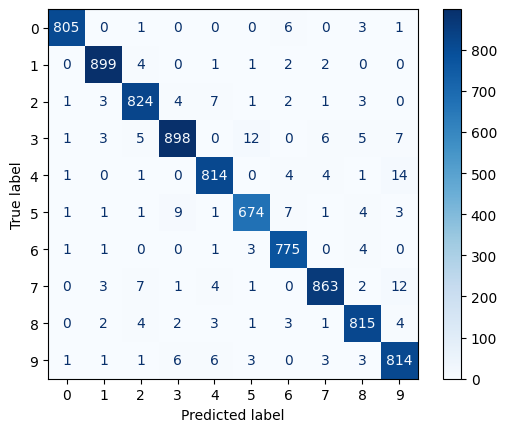

In [39]:
cm = confusion_matrix(y_test, y_pred_xg)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique().sort())
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Make baseline submission

In [43]:
results = xgboost.predict(test_df)

In [45]:
submission = pd.DataFrame(results)
submission.index.name='ImageId'
submission.index+=1
submission.columns=['Label']

In [46]:
submission.to_csv('submission.csv', header=True)